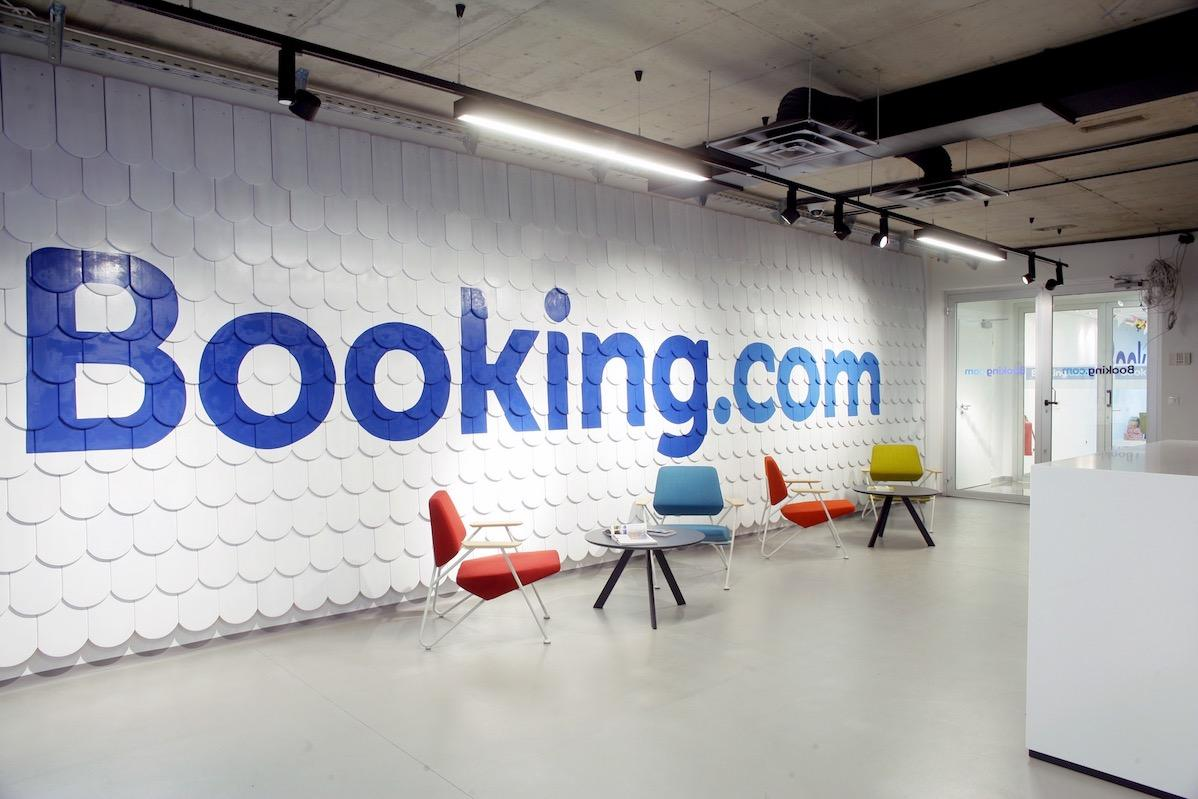

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
#for request website 
import requests
import urllib.parse

#for Nlp
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk import ngrams


nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfb=pd.read_csv('/content/drive/MyDrive/Data set/final Project/data_hotel_reviews_clean.csv')

In [4]:
dfb.head(2)

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0               Russia   I am so angry that i made this post available...   
1              Ireland                                        No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   

                                     Positive_Review  ...       submit  \
0   Only the park outside of the hotel was beauti...  ...  Not Mention   
1   No real complaints the hotel was great great ...  ...  Not Mention   

    With a pet  extra_room_type      country tourist  year  month day  \
0  Not Mention      Not Mention  Netherlands       1  2017      8   3   
1  Not Mention      Not Mention  Netherlands       1  2017      8   3   

                               Negative_Review_clean  \
0  I am so angry that i made this post available ...   
1                                        No Negative   

                               Positive_Review_clean  
0    Only the park outside of the hotel wa beautiful  
1  No real complaint the hotel wa great great loc...  

[2 rows x 32 columns]

In [5]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515212 entries, 0 to 515211
Data columns (total 32 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        514690 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 

#1-	what is the best Hotel in each country for staying?

In [6]:
best_hotel=dfb[['Reviewer_Score','Average_Score','Hotel_Name','country','Total_Number_of_Reviews','Additional_Number_of_Scoring']]

In [7]:
best_hotel.head(3)

Reviewer_Score  Average_Score   Hotel_Name      country  \
0             2.9            7.7  Hotel Arena  Netherlands   
1             7.5            7.7  Hotel Arena  Netherlands   
2             7.1            7.7  Hotel Arena  Netherlands   

   Total_Number_of_Reviews  Additional_Number_of_Scoring  
0                     1403                           194  
1                     1403                           194  
2                     1403                           194

In [8]:
best_hotel=dfb[['Reviewer_Score','Hotel_Name','country']]
x =  best_hotel.groupby(['country','Hotel_Name'])['Reviewer_Score'].agg(["mean","count"]).reset_index().sort_values(by=["country","mean"],ascending=[False,False])
x

country                                        Hotel_Name      mean  \
1095       UK                                                41  9.711650   
1096       UK                45 Park Lane Dorchester Collection  9.603571   
1461       UK                                    The Soho Hotel  9.597452   
1210       UK                                   Haymarket Hotel  9.590909   
1151       UK                               Covent Garden Hotel  9.587838   
...       ...                                               ...       ...   
41    Austria                                        Exe Vienna  7.693447   
30    Austria                                        City Rooms  7.625000   
107   Austria                                      Hotel Vienna  7.611111   
93    Austria                  Hotel Parco di Sch nbrunn Vienna  7.352542   
26    Austria  Best Western Hotel Pension Arenberg Wien Zentrum  7.320603   

      count  
1095    103  
1096     28  
1461    157  
1210    121  
1151     74  
...     ...  
41      351  
30       44  
107     135  
93       59  
26      199  

[1494 rows x 4 columns]

In [9]:
x_best=x[(x["count"]>500) & (x["mean"]>8.3)]
x_best

country                            Hotel_Name      mean  count
1253       UK        Intercontinental London The O2  9.451196   2551
1101       UK              Amba Hotel Charing Cross  9.391720    785
1364       UK  Shangri La Hotel at The Shard London  9.368553   1113
1460       UK                             The Savoy  9.337963    540
1441       UK                   The Nadler Victoria  9.312146    601
...       ...                                   ...       ...    ...
71    Austria                    Hotel City Central  8.678686    563
18    Austria       Austria Trend Hotel Europa Wien  8.658601    529
110   Austria                  Hotel de France Wien  8.565377    956
96    Austria                     Hotel Prinz Eugen  8.425636    511
120   Austria                          Melia Vienna  8.336926    501

[177 rows x 4 columns]

In [10]:
x3=x_best.groupby(['country']).head(3)


In [11]:
x_final = x3.sort_values(by=["country","count"],ascending=[False,False])
x_final

country                            Hotel_Name      mean  count
1253           UK        Intercontinental London The O2  9.451196   2551
1364           UK  Shangri La Hotel at The Shard London  9.368553   1113
1101           UK              Amba Hotel Charing Cross  9.391720    785
1047        Spain                    Olivia Plaza Hotel  9.391591    773
962         Spain                H10 Metropolitan 4 Sup  9.324125    514
1046        Spain                   Olivia Balmes Hotel  9.410392    510
823   Netherlands                        Hotel Esther a  9.266413   1837
781   Netherlands                       Ambassade Hotel  9.364973    551
829   Netherlands                      Hotel V Nesplein  9.258654    520
664         Italy                           Hotel Berna  9.339829   1052
763         Italy               The Square Milano Duomo  9.070824    898
748         Italy                      Room Mate Giulia  9.395969    521
560        France             Pullman Paris Tour Eiffel  8.601064    846
540        France            Novotel Paris Gare De Lyon  8.414488    566
541        France              Novotel Paris Les Halles  8.428107    523
104       Austria                        Hotel Stefanie  9.181900    884
147       Austria         Steigenberger Hotel Herrenhof  9.060461    521
70        Austria                      Hotel Capricorno  9.269667    511

The best 3 hotels in each country were selected based on the guests’ reviews and according to the number of guests for the same hotel in the data. We did not rely on the average score because it is better to rely on the guests in the data who reviewed.

#2-	What are the best destination and best hotels for Arab guests, and what were their reviews?

In [12]:
arab_guest=dfb[['Reviewer_Score','regions','Reviewer_Nationality','Hotel_Name','country','Negative_Review','Positive_Review','rooms_type','guests','stayed','extra_room_type']]


In [13]:
arab_guest=arab_guest[arab_guest['regions']=='Arabic_Region']

In [14]:
arab_guest.head(2)

Reviewer_Score        regions  Reviewer_Nationality   Hotel_Name  \
49             5.4  Arabic_Region  United Arab Emirates  Hotel Arena   
68             7.9  Arabic_Region  United Arab Emirates  Hotel Arena   

        country                                    Negative_Review  \
49  Netherlands   Service horrible Pillows super stiff and big ...   
68  Netherlands   The bathroom was amazing Though we were two f...   

                                      Positive_Review        rooms_type  \
49                                      clean and new   Large King Room   
68   Beautiful design comfortable room friendly st...  Duplex Twin Room   

    guests  stayed extra_room_type  
49  Couple       1     Not Mention  
68  Couple       4     Not Mention

In [15]:
arab_guest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36070 entries, 49 to 515209
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer_Score        36070 non-null  float64
 1   regions               36070 non-null  object 
 2   Reviewer_Nationality  36070 non-null  object 
 3   Hotel_Name            36070 non-null  object 
 4   country               36070 non-null  object 
 5   Negative_Review       36070 non-null  object 
 6   Positive_Review       36070 non-null  object 
 7   rooms_type            36070 non-null  object 
 8   guests                36070 non-null  object 
 9   stayed                36070 non-null  int64  
 10  extra_room_type       36070 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.3+ MB


In [16]:
df1=arab_guest.groupby('Reviewer_Nationality')[['Reviewer_Score']].agg('count').sort_values(by='Reviewer_Score', ascending=False).reset_index().head(10)
fig = px.bar(df1, y='Reviewer_Score', x='Reviewer_Nationality', text_auto='.2s',labels={'Reviewer_Nationality': 'Nationality', 'Reviewer_Score':'Count'},title="Nationalities of the Arab region by Count")
fig.show()


In [17]:
df2=arab_guest.groupby('country')[['Reviewer_Score']].agg('count').sort_values(by='Reviewer_Score', ascending=False).reset_index().head(10)
fig = px.bar(df2, y='Reviewer_Score', x='country', text_auto='.2s',labels={'country': 'country', 'Reviewer_Score':'Count'},title="Most destinations for Arab nationalities",color_discrete_sequence=["green", "red", "green", "blue", "purple"])
fig.show()


In [18]:
arab_guest.describe(include = "object")

regions  Reviewer_Nationality                     Hotel_Name  \
count           36070                 36070                          36070   
unique              1                    20                           1457   
top     Arabic_Region  United Arab Emirates  The Cumberland A Guoman Hotel   
freq            36070                 10229                            581   

       country Negative_Review Positive_Review            rooms_type  guests  \
count    36070           36070           36070                 36070   36070   
unique       6           24158           26054                  1510      11   
top         UK     No Negative     No Positive  Superior Double Room  Couple   
freq     13577            6718            2979                  2048   10464   

       extra_room_type  
count            36070  
unique             246  
top        Not Mention  
freq             32717

In [19]:
arab_guest.describe()

Reviewer_Score        stayed
count    36070.000000  36070.000000
mean         7.922556      3.670918
std          1.859062      2.582396
min          2.500000      0.000000
25%          6.700000      2.000000
50%          8.300000      3.000000
75%          9.600000      5.000000
max         10.000000     31.000000

In [20]:
px.histogram(arab_guest, x="stayed", nbins=10,text_auto=True,title='nights Distribution ',)


In [21]:
px.histogram(arab_guest, x="Reviewer_Score", nbins=10,text_auto=True,title='Reviewer_Score Distribution ',color_discrete_sequence=['indianred'] )


<Figure size 864x576 with 0 Axes>

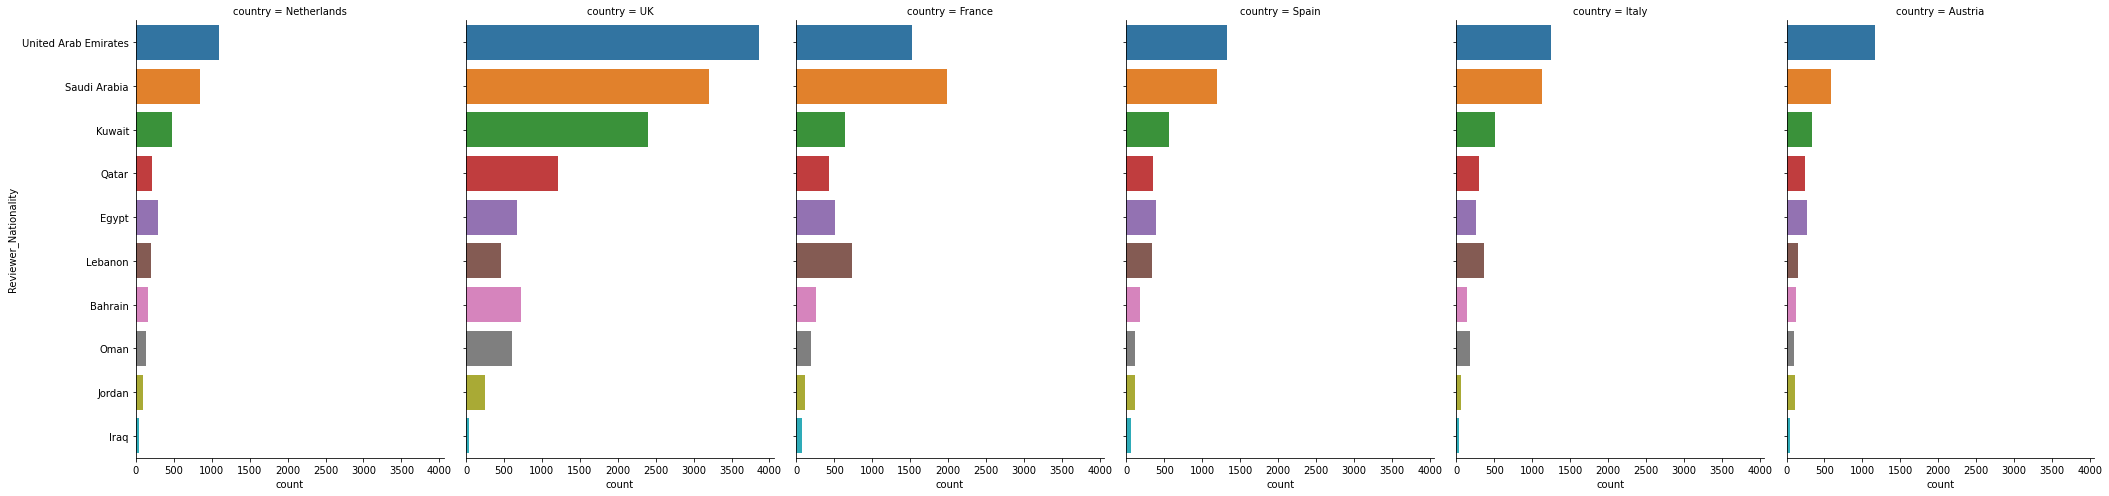

In [22]:
plt.figure(figsize=(12,8))
sns.catplot( y="Reviewer_Nationality",col="country", col_wrap=6,data=arab_guest, kind="count",height=7, aspect=.7,order = arab_guest['Reviewer_Nationality'].value_counts()[:10].index )




In [23]:
st_for_wc=["positive","no negative","nothing","none","everything","n a","n","na","not much",'no',"object", "dtype","Positive_Review","Negative_Review","Wa","negative",'super','two','name','st','though','although','available','angry','put','away',
           'cen','kept','also','con','like','se','great','excellent','good','fantastic']

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42,stopwords =list(stop_words)+st_for_wc
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
  

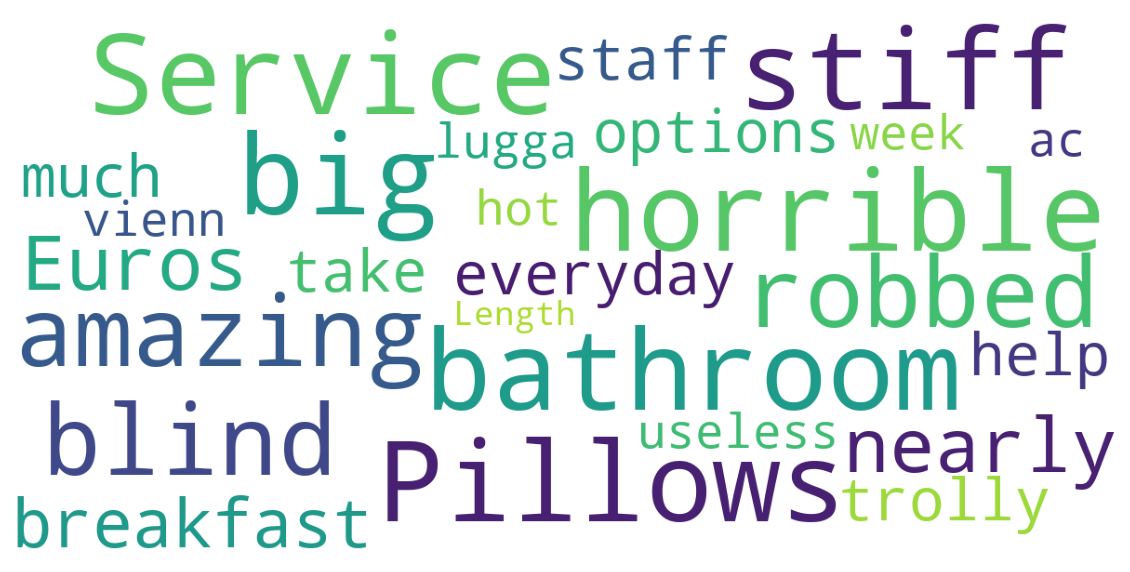

In [25]:
show_wordcloud(arab_guest["Negative_Review"])

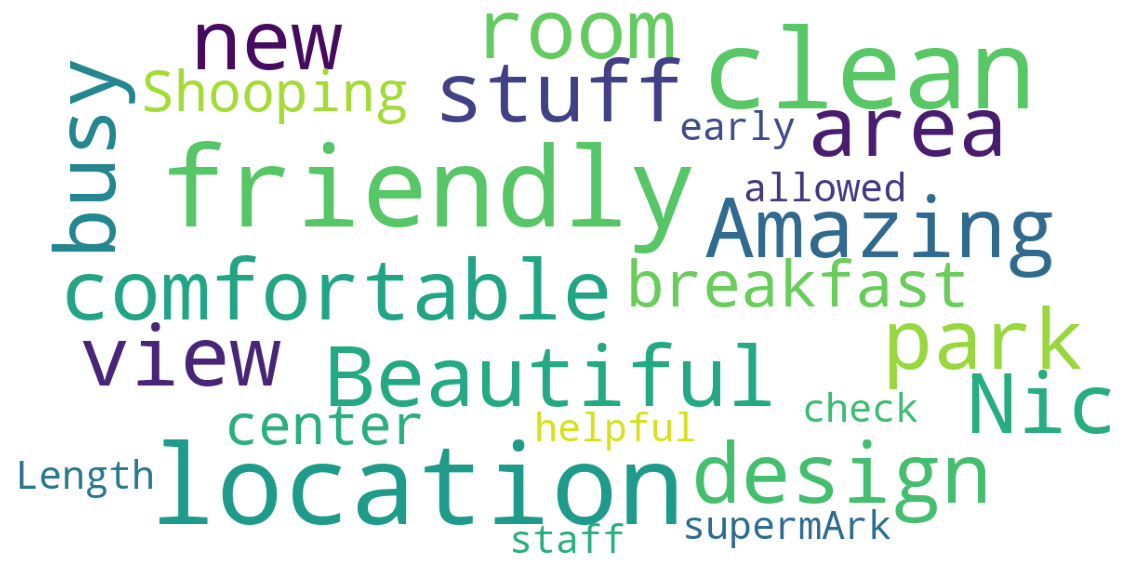

In [26]:
show_wordcloud(arab_guest["Positive_Review"])

In [27]:
df3=arab_guest.groupby('guests')[['Reviewer_Score']].agg('count').sort_values(by='Reviewer_Score', ascending=False).reset_index().head(5)
fig = px.bar(df3, y='Reviewer_Score', x='guests', text_auto='.2s',labels={'guests': 'guests', 'Reviewer_Score':'Count'},title="Guest types")
fig.show()


•	About the Arab guests, we have 20 different nationalities, their number reaches more than 36 thousand assessments, most of them are from the Arab Gulf region, and in order, the Emirates, then Saudi Arabia, then Kuwait and then Qatar.

•	As for the countries, the most destinations were the United Kingdom, then France and Spain.

•	Average number of nights stay 3 nights.

•	The rating is from 7.5 to 9.5 Emiratis are the most numerous in all countries except France, the Saudis are more.

•	The most comment negative comments of Arab guests are: pillows, blinds, bathrooms, and robbed.

•	The most positive comments from Arab guests are: location, cleanliness, hotel staff, parks.


#3-	What about business trips, the average days of stay and the most reserved rooms, and do they have special requests during booking, and what are the most negative and positive reviews?

In [28]:
b_trip=dfb[['Reviewer_Score','trip_type','regions','Reviewer_Nationality','Hotel_Name','country','Negative_Review','Positive_Review','rooms_type','guests','stayed','extra_room_type','tourist']]


In [29]:
b_trip=b_trip[b_trip['trip_type']=='Business trip']

In [30]:
b_trip.head(1)

Reviewer_Score      trip_type regions Reviewer_Nationality   Hotel_Name  \
11             5.8  Business trip  Europe               France  Hotel Arena   

        country                                    Negative_Review  \
11  Netherlands   6 30 AM started big noise workers loading woo...   

          Positive_Review        rooms_type         guests  stayed  \
11   Style location rooms  Duplex Twin Room  Solo traveler       1   

   extra_room_type  tourist  
11     Not Mention        1

In [31]:
b_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82853 entries, 11 to 515205
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer_Score        82853 non-null  float64
 1   trip_type             82853 non-null  object 
 2   regions               82853 non-null  object 
 3   Reviewer_Nationality  82509 non-null  object 
 4   Hotel_Name            82853 non-null  object 
 5   country               82853 non-null  object 
 6   Negative_Review       82853 non-null  object 
 7   Positive_Review       82853 non-null  object 
 8   rooms_type            82853 non-null  object 
 9   guests                82853 non-null  object 
 10  stayed                82853 non-null  int64  
 11  extra_room_type       82853 non-null  object 
 12  tourist               82853 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 8.8+ MB


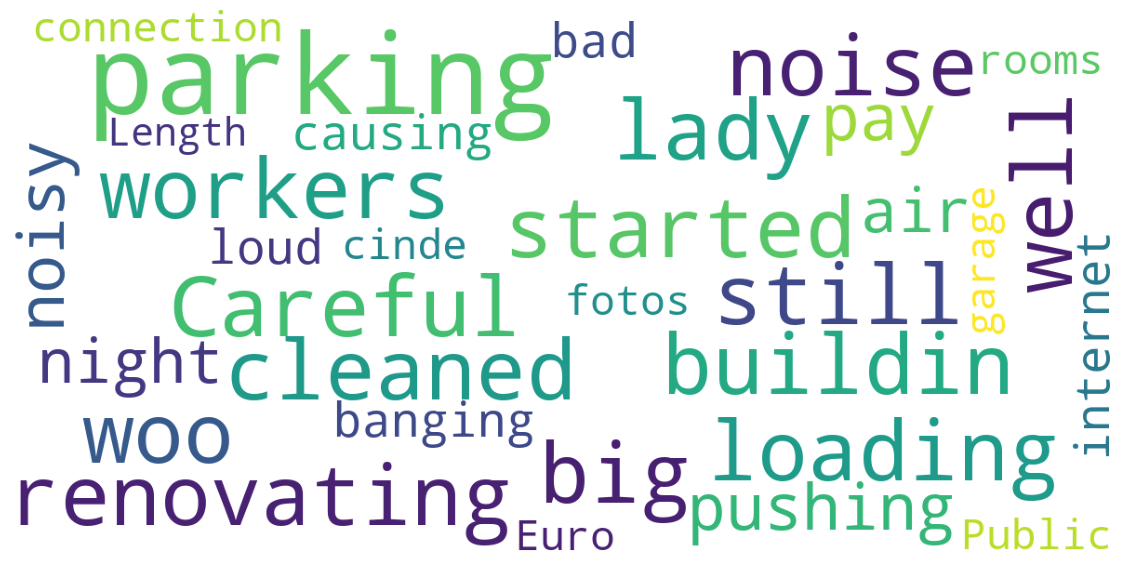

In [32]:
show_wordcloud(b_trip["Negative_Review"])

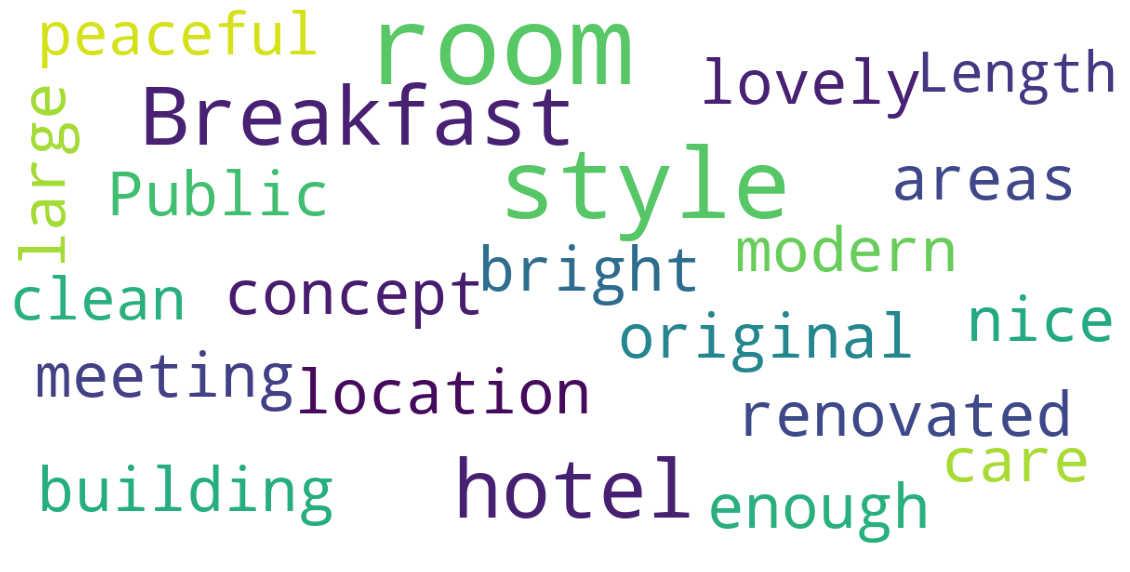

In [33]:
show_wordcloud(b_trip["Positive_Review"])

In [34]:
b_trip["tourist"].value_counts(normalize=True)[:11]

1    0.669089
0    0.330911
Name: tourist, dtype: float64

In [35]:
b_trip["Reviewer_Nationality"].value_counts()& (b_trip["tourist"] == 0).sum()

United Kingdom              26648
United States of America     2560
Netherlands                  2577
Germany                      2049
Italy                        2072
                            ...  
Vanuatu                         1
Gambia                          1
Bhutan                          1
Saint Martin                    1
Djibouti                        1
Name: Reviewer_Nationality, Length: 202, dtype: int64

In [36]:
df4=b_trip[b_trip['tourist']==0] 
df4['Reviewer_Nationality'].value_counts()

United Kingdom    25144
France              609
Italy               609
Netherlands         476
Spain               314
Austria             265
Name: Reviewer_Nationality, dtype: int64

In [37]:
df5=b_trip[b_trip['tourist']==1] 
df5['Reviewer_Nationality'].value_counts()

United Kingdom              6692
United States of America    3810
Netherlands                 2293
Germany                     2177
Ireland                     1942
                            ... 
Vanuatu                        1
Gambia                         1
Bhutan                         1
Saint Martin                   1
Djibouti                       1
Name: Reviewer_Nationality, Length: 202, dtype: int64

•	We have more than 80,000 guests for business

•	Duration of stay from one night to 3 nights, the most frequent one is one night.

•	There is no preference for room types, but most are Double Room.

•	Extra requests do not prefer to have a window in the room and prefer a balcony with a view.

•	Most of the negative comments talked about noise and workers, and some comments related to the car, such as the parking lot or the garage.

•	Positive comments were about admiring the style of the hotel, the design of the building, the room decor, and the breakfast.

•	About 30% of business guest data from the same country as the hotel  and most of them are from the UK.	


#4-	What about the type of guests, whether single or couple, what are the most important points that make them happy with the experience, and also what are the most important requests of those who have pets?

In [38]:
df_guests=dfb[['Reviewer_Score','trip_type','regions','Reviewer_Nationality','Hotel_Name','country','Negative_Review','Positive_Review','rooms_type','guests','stayed','extra_room_type','tourist']]


In [39]:
df_guests.guests.value_counts()

Couple                                   251265
Solo traveler                            108222
Group                                     65197
Family with young children                60751
Family with older children                26229
Travelers with friends                     2143
With a pet,Couple                           740
With a pet,Family with young children       224
With a pet,Solo traveler                    209
With a pet,Group                            141
With a pet,Family with older children        91
Name: guests, dtype: int64

In [40]:
df_couple=df_guests[df_guests['guests']=='Couple']
df_solo=df_guests[df_guests['guests']=='Solo traveler']
df_with_pet=df_guests[df_guests['guests'].str.contains("With a pet")]

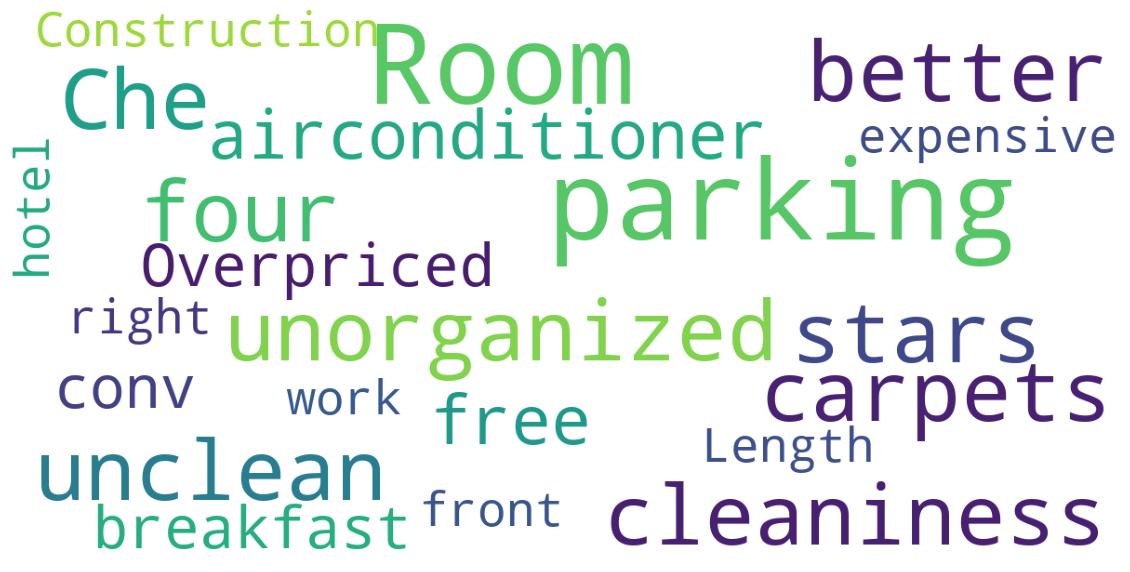

In [41]:
show_wordcloud(df_with_pet["Negative_Review"])

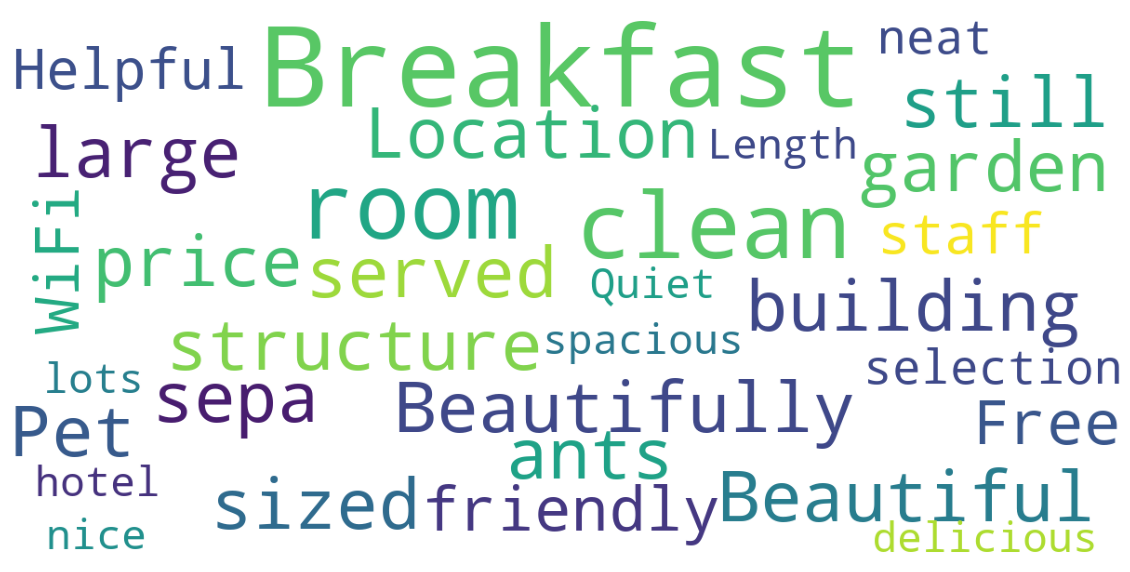

In [42]:
show_wordcloud(df_with_pet["Positive_Review"])

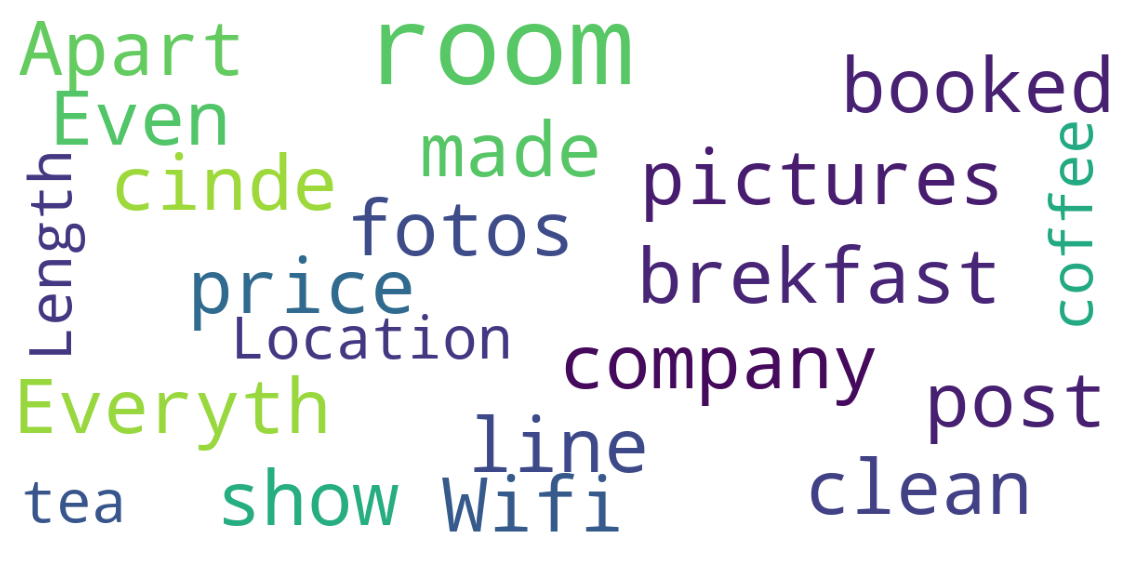

In [43]:
show_wordcloud(df_couple["Negative_Review"])

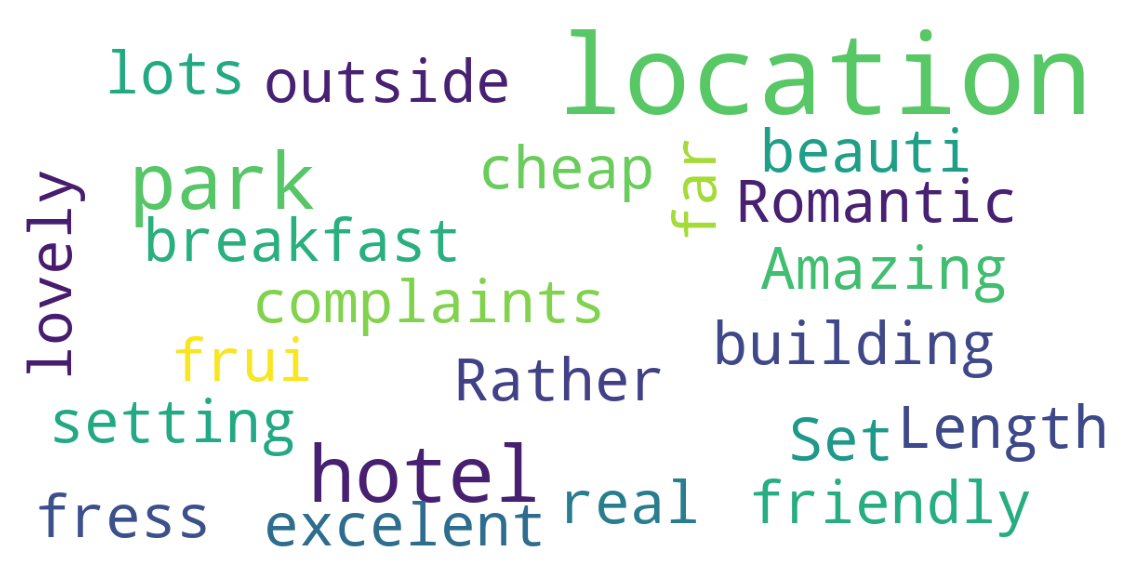

In [44]:
show_wordcloud(df_couple["Positive_Review"])

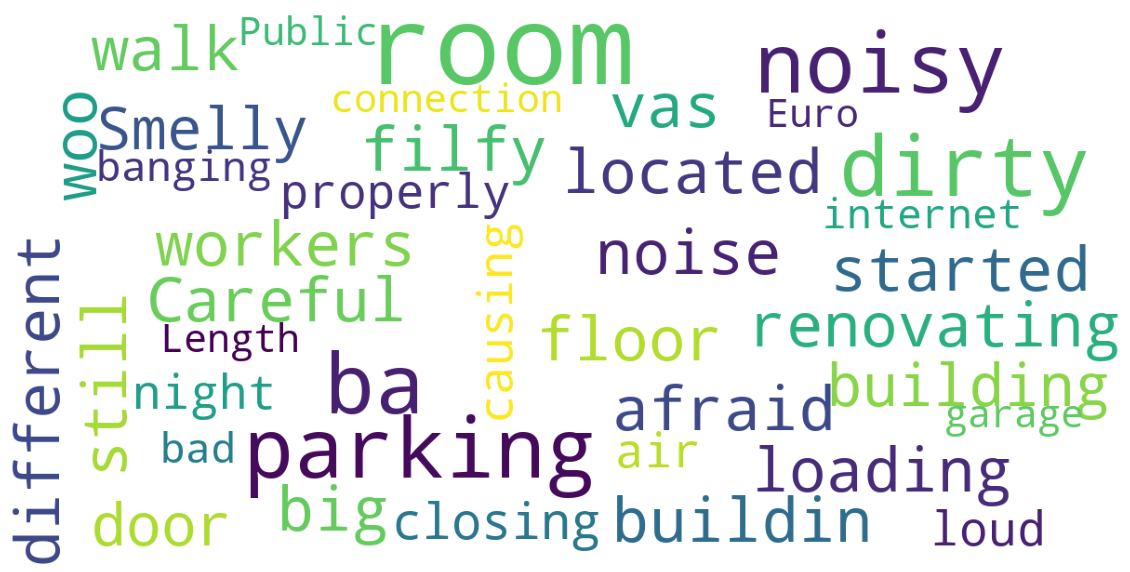

In [45]:
show_wordcloud(df_solo["Negative_Review"])

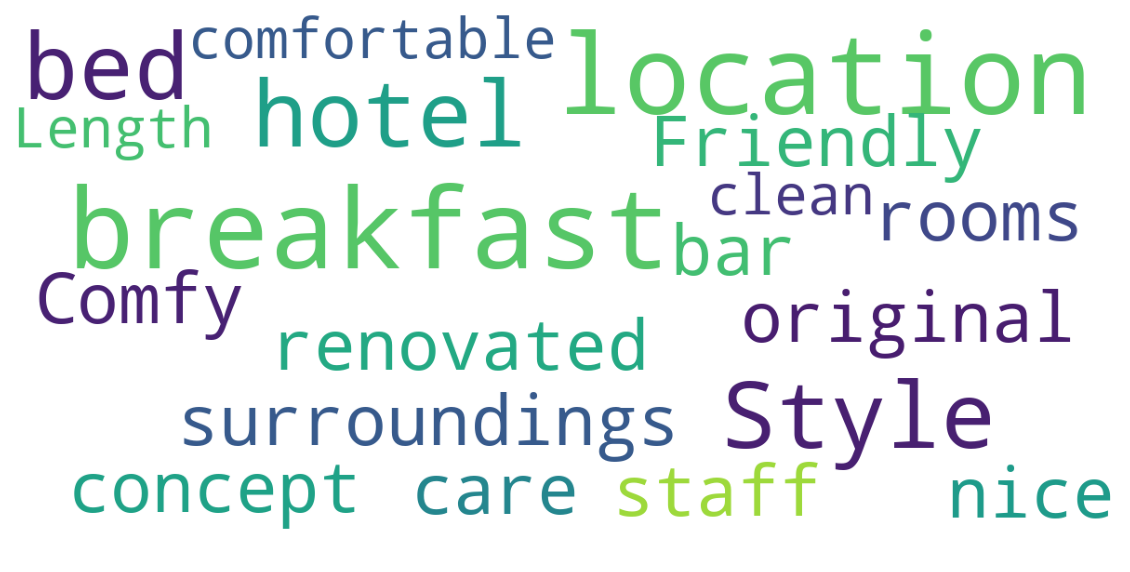

In [46]:
show_wordcloud(df_solo["Positive_Review"])

•	With pets they were happy because of the breakfast, the building, room service and the gardens and spa.

•	With pets they were unhappy because of the carpets, the parking, over price, cleanliness.

•	Most of the guests are couples or with family, and couples are 50% of the data.

•	The couples were not satisfied with the breakfast, tea, and coffee services, and many of them talked about the Wi-Fi service and the rooms, and some mentioned that the pictures of the hotel were not the truth.

•	But the couples were satisfied with the location of the hotel, the cheap price, and the location outside the hotel, and romantic.

•	As for solo guests, the negative comments were more than positive. The negatives were noise, bad smell, uncleanliness, and parking.

•	As for the positive, the location was breakfast and the room.

•	There are no special requests for with pets.


#5-	Are the number of guest review words indicated on the score, and what are the most frequently used words in positive and negative reviews, and the most sentences or most effective?

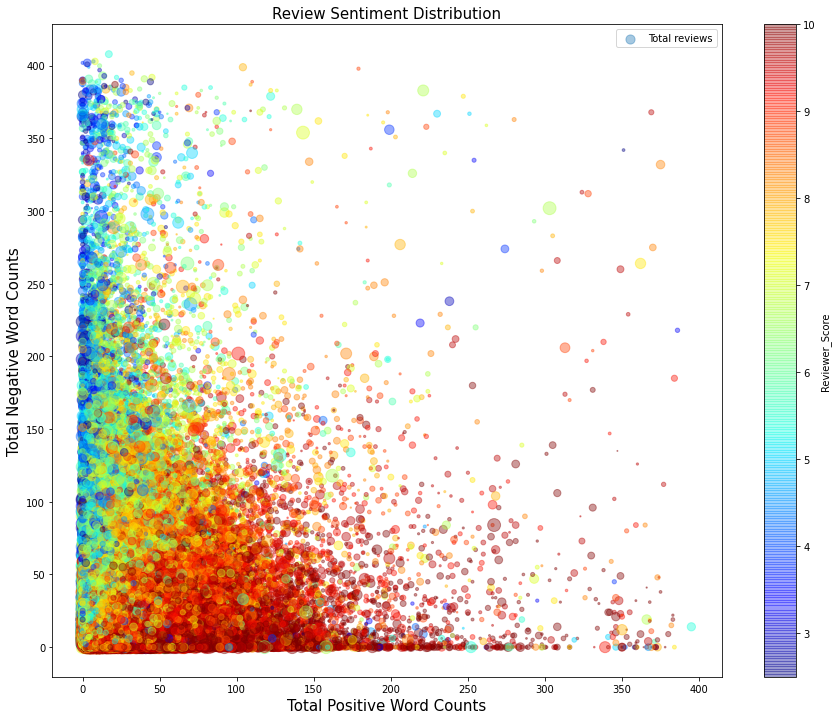

In [47]:
dfb.plot(kind='scatter', 
                      x='Review_Total_Positive_Word_Counts', 
                      y='Review_Total_Negative_Word_Counts', 
                      label='Total reviews',
             s=dfb.Total_Number_of_Reviews/100,
             c='Reviewer_Score',
             cmap=plt.get_cmap('jet'), 
             colorbar=True, 
             alpha=0.4, figsize=(15,12),
             sharex=False, 
             )
font_size = 15
plt.title("Review Sentiment Distribution",  fontsize=font_size)
plt.xlabel("Total Positive Word Counts", fontsize=font_size)
plt.ylabel("Total Negative Word Counts",  fontsize=font_size)
plt.legend()
plt.show()

There's no strong relationship between the number of words and the reviewer score of references because many reviews only written no negatives or no positives, Therefore, we couldn't find a relationship and we couldn't delete the small reviews because they're important and express the guest's satisfaction or dissatisfaction.

#6-	What is the ratio of tourists to non-tourists in the data?

In [48]:
dfb["tourist"].value_counts(normalize=True)

1    0.653793
0    0.346207
Name: tourist, dtype: float64

In [49]:
px.pie(dfb,names='tourist')

Through the tourist column, the data filtered, whereby a person who has a nationality and wrote a review of a hotel in the same country is not a tourist, and if otherwise, he is a tourist, in the data We have 35%  are non-tourists and 65% are tourists.

#7-	Is there a difference between the behavior of those who wrote a review for the first time and others?

In [50]:
df_first=dfb[['Reviewer_Score','trip_type','regions','Reviewer_Nationality','Hotel_Name','country','Negative_Review','Positive_Review','rooms_type','guests','stayed','extra_room_type','tourist','Total_Number_of_Reviews_Reviewer_Has_Given']]


In [51]:
df_first1=df_first[df_first['Total_Number_of_Reviews_Reviewer_Has_Given']==1]

In [52]:
df_first1.shape

(154506, 14)

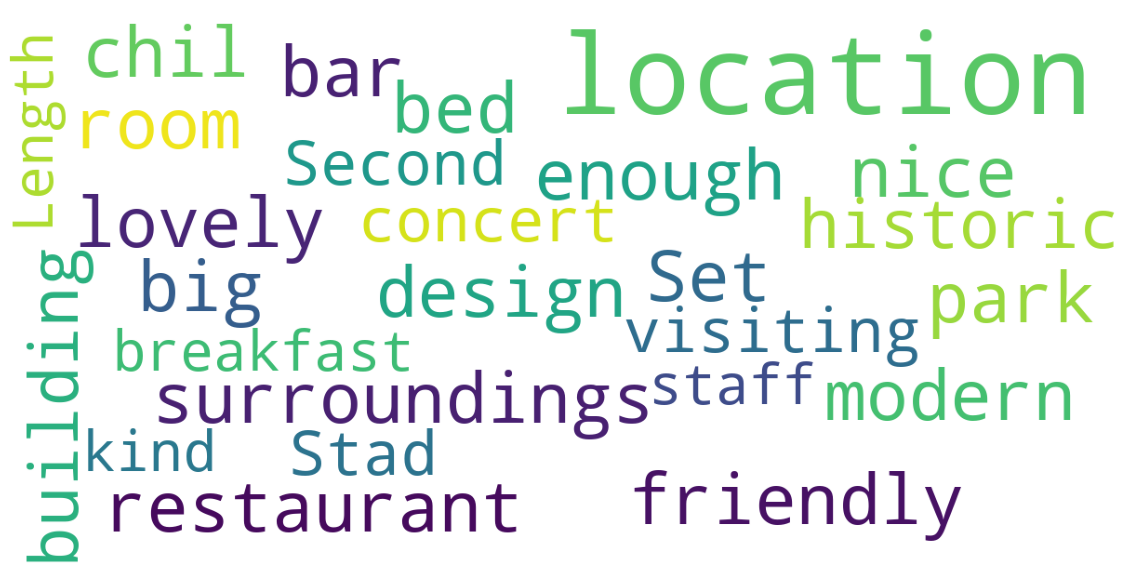

In [53]:
show_wordcloud(df_first1["Positive_Review"])

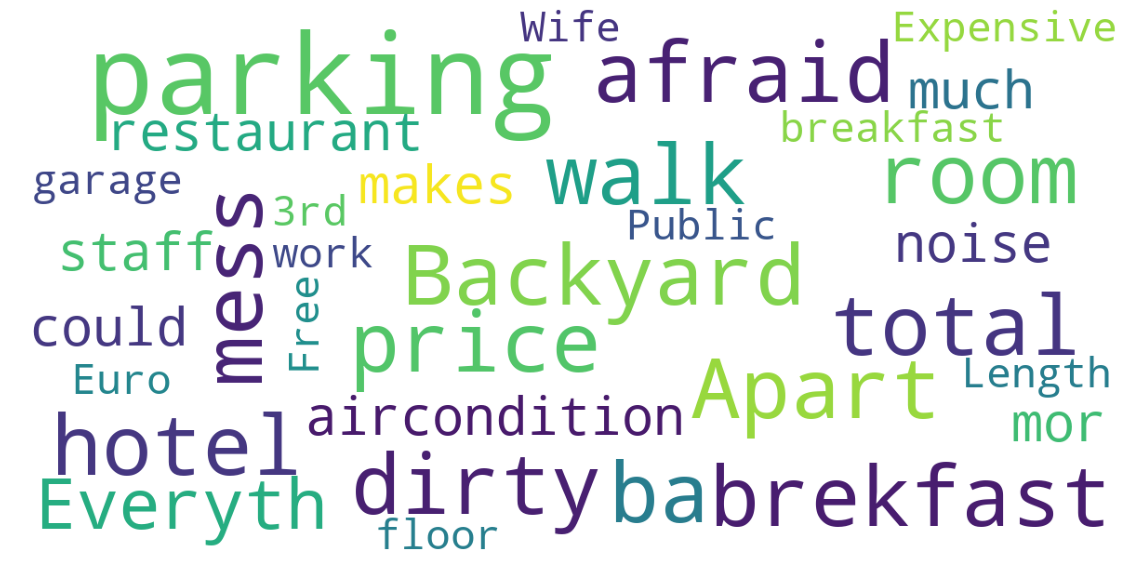

In [54]:
show_wordcloud(df_first1["Negative_Review"])

In [55]:
df_first1.head(1)

Reviewer_Score     trip_type         regions Reviewer_Nationality  \
3             3.8  Leisure trip  United Kingdom       United Kingdom   

    Hotel_Name      country  \
3  Hotel Arena  Netherlands   

                                     Negative_Review  \
3   My room was dirty and I was afraid to walk ba...   

                                     Positive_Review          rooms_type  \
3   Great location in nice surroundings the bar a...  Duplex Double Room   

          guests  stayed extra_room_type  tourist  \
3  Solo traveler       3     Not Mention        1   

   Total_Number_of_Reviews_Reviewer_Has_Given  
3                                           1

In [56]:
df_first1['tourist'].value_counts(normalize=True)

1    0.564619
0    0.435381
Name: tourist, dtype: float64

In [57]:
df_first1['Reviewer_Nationality'].value_counts(normalize=True)

United Kingdom              0.598416
United States of America    0.089340
Ireland                     0.034144
Australia                   0.026028
Canada                      0.017464
                              ...   
Samoa                       0.000006
Togo                        0.000006
Montserrat                  0.000006
Grenada                     0.000006
American Samoa              0.000006
Name: Reviewer_Nationality, Length: 203, dtype: float64

In [58]:
df_first1['country'].value_counts(normalize=True)

UK             0.572301
Netherlands    0.120157
Spain          0.110242
France         0.105905
Austria        0.048231
Italy          0.043163
Name: country, dtype: float64

In [59]:
df_first1.describe()

Reviewer_Score         stayed        tourist  \
count   154506.000000  154506.000000  154506.000000   
mean         8.379524       2.312428       0.564619   
std          1.718465       1.656641       0.495808   
min          2.500000       0.000000       0.000000   
25%          7.500000       1.000000       0.000000   
50%          8.800000       2.000000       1.000000   
75%          9.600000       3.000000       1.000000   
max         10.000000      31.000000       1.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  
count                                    154506.0  
mean                                          1.0  
std                                           0.0  
min                                           1.0  
25%                                           1.0  
50%                                           1.0  
75%                                           1.0  
max                                           1.0

In [60]:
df_first1.describe(include='object')

trip_type         regions Reviewer_Nationality  \
count         154506          154506               154142   
unique             3               9                  203   
top     Leisure trip  United Kingdom       United Kingdom   
freq          129063           92241                92241   

                                        Hotel_Name country Negative_Review  \
count                                       154506  154506          154506   
unique                                        1491       6          101132   
top     Britannia International Hotel Canary Wharf      UK     No Negative   
freq                                          2008   88424           39113   

       Positive_Review            rooms_type  guests extra_room_type  
count           154506                154506  154506          154506  
unique          123712                  2057      11             305  
top        No Positive  Standard Double Room  Couple     Not Mention  
freq             13392                  9829   79032          139372

In [61]:
df_first1['Positive_Review'].value_counts(normalize=True)

No Positive                                                                                                                                                                                                                                                                                                          0.086676
 Location                                                                                                                                                                                                                                                                                                            0.016867
 Everything                                                                                                                                                                                                                                                                                                          0.004874
 Nothing                                      

In [62]:
df_first2=df_first[df_first['Total_Number_of_Reviews_Reviewer_Has_Given']>1]

In [63]:
df_first2.shape

(360706, 14)

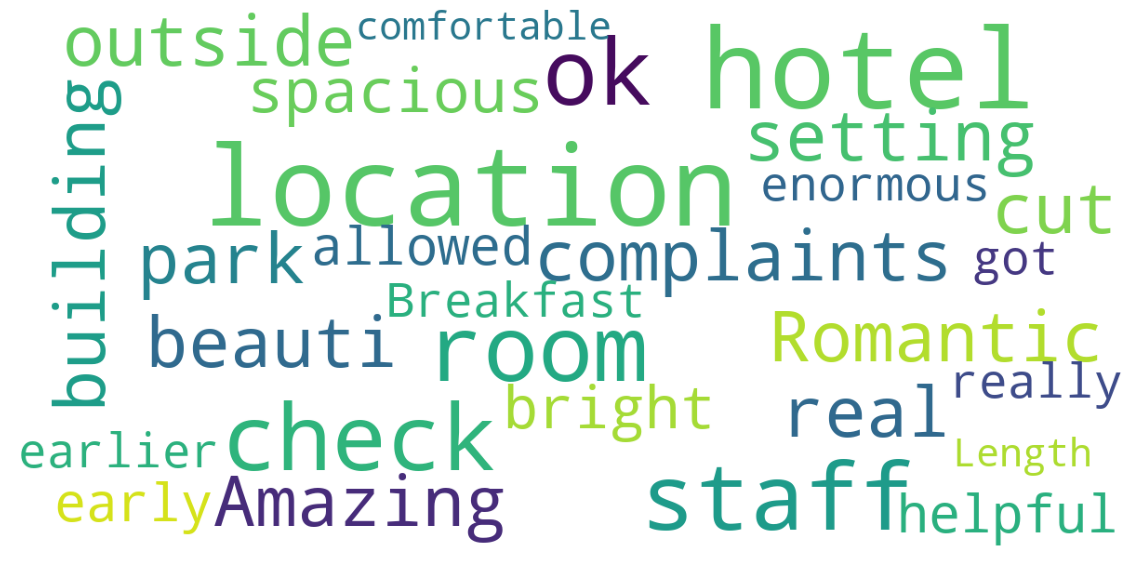

In [64]:
show_wordcloud(df_first2["Positive_Review"])

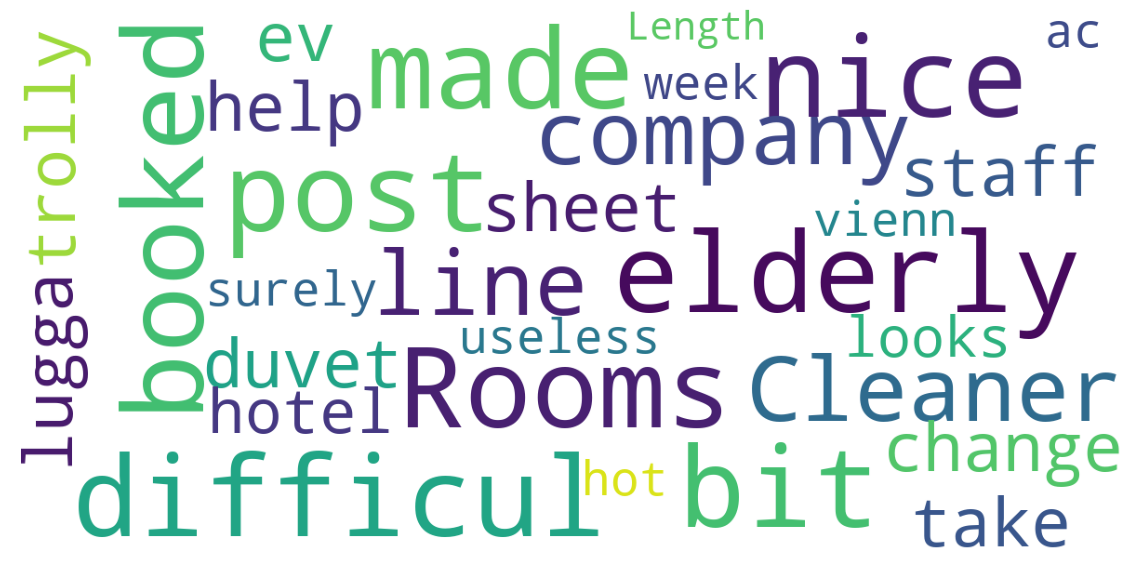

In [65]:
show_wordcloud(df_first2["Negative_Review"])

•	We made a data frame for those who were just a reviewer for the first time because they have slightly different feelings than those who have experience in assessment, and we will monitor their behavior through reviews.

•	First-time reviewers had Various comments as they were dissatisfied with the parking and garage and had a problem with cleanliness and mess, and some reviewers were complaining about the air conditioning.

•	As for the positive reviews, first-reviewers liked the hotel's surroundings, historical appearance, parks, concerts, and hospitality services such as drinks and breakfast.
